In [3]:
import numpy as np
import re
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr
%matplotlib inline

In [24]:
def mpl_params(quality='high'):
    """
    Apply my plotting style to produce nice looking figures.
    Call this at the start of a script which uses matplotlib,
    and choose the correct setting.
    :return:
    """
    if quality == 'high':
        matplotlib.style.use('seaborn-colorblind')
        param_set = {"pgf.texsystem": "pdflatex",
                     "text.usetex": True,
                     "font.family": "serif",
                     "font.serif": [],
                     "font.sans-serif": ["DejaVu Sans"],
                     "font.monospace": [],
                     "lines.linewidth": 0.75,
                     "axes.labelsize": 10, #10
                     "font.size": 8,
                     "legend.fontsize": 9,
                     "xtick.labelsize": 10, #10,
                     "ytick.labelsize": 10, #10,
                     "scatter.marker": '+',
                     "image.cmap": 'RdYlBu_r',
                     "pgf.preamble": [r"\usepackage[utf8x]{inputenc} \usepackage[T1]{fontenc}"]
                     }
    else:
        matplotlib.style.use('seaborn-colorblind')
        param_set = {"text.usetex": False,
                     "lines.linewidth": 0.75,
                    "font.family": "sans-serif",
                     "font.serif": [],
                     "font.sans-serif": ["DejaVu Sans"],
                     "axes.labelsize": 10,
                     "font.size": 6,
                     "legend.fontsize": 8,
                     "xtick.labelsize": 10,
                     "ytick.labelsize": 10,
                     "image.cmap": 'RdYlBu_r',
                     }

    matplotlib.rcParams.update(param_set)

def tex_escape(text):
    """
    It is better to plot in TeX, but this involves escaping strings.
    from:
        https://stackoverflow.com/questions/16259923/
        how-can-i-escape-latex-special-characters-inside-django-templates
        :param text: a plain text message
        :return: the message escaped to appear correctly in LaTeX
    # removed unicode(key) from re.escape because this seemed an unnecessary,
      and was throwing an error.
    """
    conv = {
            '&': r'\&',
            '%': r'\%',
            '$': r'\$',
            '#': r'\#',
            '_': r'\_',
            '{': r'\{',
            '}': r'\}',
            '~': r'\textasciitilde{}',
            '^': r'\^{}',
            '\\': r'\textbackslash{}',
            '<': r'\textless{}',
            '>': r'\textgreater{}',
            }
    regex = re.compile('|'.join(re.escape(key) for key in sorted(conv.keys(), key=lambda item: - len(item))))
    return regex.sub(lambda match: conv[match.group()], text)

def proper_units(text):
    conv = {
            'degK': r'K',
            'degC': r'$^{\circ}C$',
            'degrees\_celsius': r'$^{\circ}$C',
            'degrees\_north': r'$^{\circ}$N',
            'degrees\_east': r'$^{\circ}$E',
            'degrees\_west': r'$^{\circ}$W'
            }
    regex = re.compile('|'.join(re.escape(key) for key in sorted(conv.keys(), key=lambda item: - len(item))))
    return regex.sub(lambda match: conv[match.group()], text)

def change_ds_for_graph(dsA):
    
    ds = dsA.copy()
    
    for varname, da in ds.data_vars.items():
        for attr in da.attrs:
            if attr in ['units', 'long_name']:
                da.attrs[attr] = proper_units(tex_escape(da.attrs[attr]))
                
    for coord in ds.coords:
        for attr in ds.coords[coord].attrs:
            if attr in ['units', 'long_name']:
                da.coords[coord].attrs[attr] = proper_units(tex_escape(da.coords[coord].attrs[attr]))
    
    return ds
    

In [25]:
mpl_params(quality='high')

Text(0, 0.5, 'Latitude [$^{\\circ}$N]')

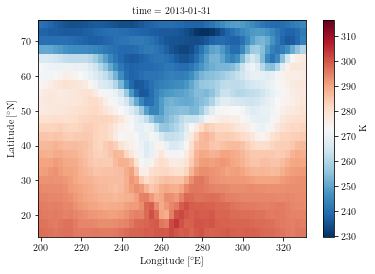

In [6]:
ds = xr.tutorial.load_dataset('air_temperature')
plot_data = ds.air.isel(time=120)
plot = plot_data.plot(center=273.15, cbar_kwargs={'label': 'K'})
plt.title(tex_escape('time = '+ np.datetime_as_string(plot_data.coords['time'].data, unit='D')))
plt.xlabel(proper_units(tex_escape(ds.coords['lon'].long_name + ' [' + ds.coords['lon'].units + ']')))
plt.ylabel(proper_units(tex_escape(ds.coords['lat'].long_name + ' ['+ ds.coords['lat'].units + ']')))

In [11]:
for varname, da in ds.data_vars.items():
    for attr in da.attrs:
        if attr in ['units', 'unit', 'long_name']:
            print(attr, da.attrs[attr])

long_name 4xDaily Air temperature at sigma level 995
units degK


In [28]:
ds2 = ds.copy()

In [30]:
ds3 = change_ds_for_graph(ds2)

In [31]:
ds3

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [21]:
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 241.2 242.5 243.5 ... 296.49 296.19 295.69
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [2]:
ds3.air.isel(time=120).plot(center=273.15)

NameError: name 'ds3' is not defined